In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

#load data
df = pd.read_csv('Telco-Customer-Churn.csv')
print("Rows,Cols:", df.shape)
display(df.head())

#quick info and nulls
print("\n--- Data Info ---")
display(df.info())
print("\n--- Missing Values ---")
display(df.isnull().sum())

#basic stats for numeric columns
display(df.describe(include=[np.number]).T)

#sample unique counts for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    print(c, "->", df[c].nunique())


Rows,Cols: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

None


--- Missing Values ---


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


customerID -> 7043
gender -> 2
Partner -> 2
Dependents -> 2
PhoneService -> 2
MultipleLines -> 3
InternetService -> 3
OnlineSecurity -> 3
OnlineBackup -> 3
DeviceProtection -> 3
TechSupport -> 3
StreamingTV -> 3
StreamingMovies -> 3
Contract -> 3
PaperlessBilling -> 2
PaymentMethod -> 4
TotalCharges -> 6531
Churn -> 2


In [ ]:

df_clean = df.copy()

#Convert TotalCharges to numeric (coerce invalid values to NaN)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

#Check how many became NaN
print("Nulls in TotalCharges after conversion:", df_clean['TotalCharges'].isnull().sum())

#Fill missing TotalCharges with median
df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)

#Drop customerID because not useful for ML
df_clean.drop('customerID', axis=1, inplace=True)

#Confirm no missing values remain
print("\nRemaining NaNs per column:")
print(df_clean.isnull().sum())


Nulls in TotalCharges after conversion: 11

Remaining NaNs per column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-1827177026.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_model = df_clean.copy()

# Convert target column to binary
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

# Label encode all categorical columns
label_cols = df_model.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Define features (X) and target (y)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 19), (1409, 19), (5634,), (1409,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
log_acc = accuracy_score(y_test, y_pred_log)
log_cm  = confusion_matrix(y_test, y_pred_log)
log_report = classification_report(y_test, y_pred_log)

print("📌 Logistic Regression Accuracy:", log_acc)
print("\n📌 Confusion Matrix:")
print(log_cm)
print("\n📌 Classification Report:\n", log_report)


📌 Logistic Regression Accuracy: 0.7991483321504613

📌 Confusion Matrix:
[[919 116]
 [167 207]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cm  = confusion_matrix(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("🔥 Random Forest Accuracy:", rf_acc)
print("\nConfusion Matrix:\n", rf_cm)
print("\nClassification Report:\n", rf_report)


🔥 Random Forest Accuracy: 0.801277501774308

Confusion Matrix:
 [[938  97]
 [183 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



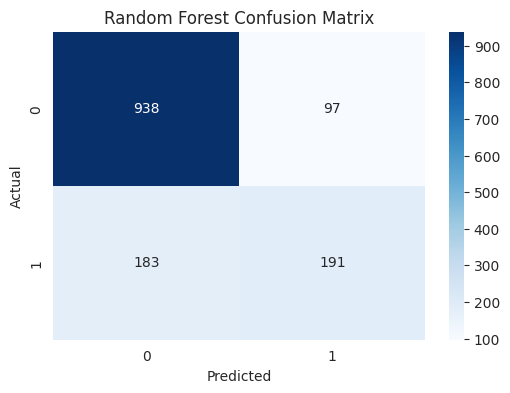

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



/tmp/ipython-input-70375707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


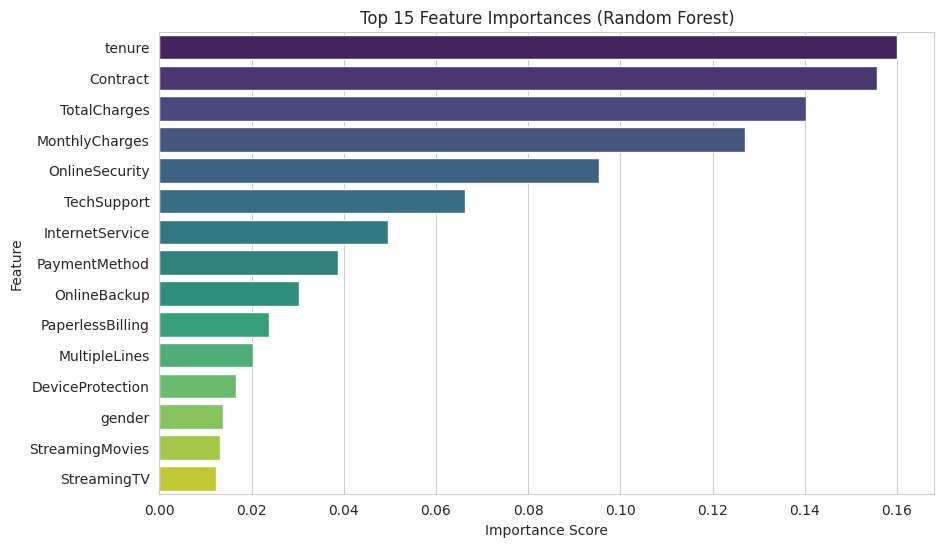

In [ ]:
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
import joblib

joblib.dump(rf_model, "churn_model.pkl")
print("Model saved as churn_model.pkl")


Model saved as churn_model.pkl
